#### -----------------------------------------------------------------------------------------------------------------------------------------
## PART I： 彈力阻值上下限
#### -----------------------------------------------------------------------------------------------------------------------------------------

# 0. 載入套件

In [1]:
### packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#time
import time

#install scipy
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#data visualization
import seaborn as sns
#R packages

#import rpy2.robjects as robjects

#pingouin
import pingouin as pi

%matplotlib inline

# 1. 設定資料夾路徑

In [25]:
# data path
year=input('Year:')
path = './'+year+'/'
print("Path:",path)

Year: 2018


Path: ./2018/


# 2. 資料讀取與檢查

In [26]:
# file list and data head
import glob
import re
import sys
import xlrd

from datetime import datetime as dt
from sys import argv, stdout as cout
from time import sleep as sl

import warnings
warnings.filterwarnings("ignore")

pd.options.display.encoding = sys.stdout.encoding

files = [f for f in glob.glob(path + "**/*.csv", recursive=True)]



print('----------------------------------------------------------------------------------------------------------------------------')
print('|| File list ||                                                                                        || Total files:',len(files),'||')
print('''----------------------------------------------------------------------------------------------------------------------------


''')

data_list={}
range_list={}

print("Loading and Processing...")
time1=time.time()
#print(time1)

for i in range(len(files)):
    #print(files[i])
    f_app=0
    f_app=os.path.join(files[i])
    data_list[i]= pd.read_csv(f_app,engine='python',header=None)
    data_list[i]=data_list[i].drop(data_list[i].index[[0,1,2,3,4,5,6,7,-1,-2,-3,-4,-5,-6,-7,-8,-9]])
    data_list[i]=data_list[i].dropna(how='all', axis=1)
    data_list[i].columns=[x for x in range(len(data_list[i].columns))]
    data_list[i]=data_list[i].rename(index=int, columns={0:"Specification",1: "Max_sp", 2: "Max_sp_stroke",3:"reMax_sp"
                                                        ,4:"reMax_sp_stroke",5:"Resi",6:"Resi_stroke",7:"rResi",8:"rResi_stroke"})
    data_list[i]=data_list[i].reset_index(drop=True)
    for col in data_list[i].columns:
        data_list[i][col]=data_list[i][col].str.replace("*", '')
        data_list[i][col]=data_list[i][col].convert_objects(convert_numeric=True)
    range_list[i]=data_list[i].loc[[1,2],['Max_sp','reMax_sp','Resi','rResi']]
    percent= i/100
    goal=len(files)/100
    if i+1 == len(files):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()

print("[DONE]")
time.sleep(1)
print('''

File1:''',files[0],'''
''')

data_list[0].head(10)

----------------------------------------------------------------------------------------------------------------------------
|| File list ||                                                                                        || Total files: 3240 ||
----------------------------------------------------------------------------------------------------------------------------



Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]


File1: ./2018\1-05840-030(1070126)#10701020-05-1.xls.csv 



,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Upper,37.2,NaN,37.2,NaN,175.0,NaN,175.0,0.500
2,Lower,24.8,NaN,24.8,NaN,NaN,NaN,NaN,0.350
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-1,32.2,0.499,31.7,0.5,494.9,0.5,789.6,0.351
5,1-2,32.6,0.499,32.3,0.5,544.1,0.5,863.5,0.432
6,1-3,32.2,0.498,32.1,0.5,551.6,0.5,877.5,0.374
7,1-4,32.2,0.498,31.7,0.5,853.6,0.5,855.0,0.500
8,1-5,32.3,0.499,31.8,0.5,555.8,0.5,835.8,0.474
9,2-1,31.7,0.497,31.5,0.5,71.9,0.5,94.0,0.485


# 3. 資料前處理與視覺化

----------------------------------------------------------------------------------------------------------------------------
|| Histogram plot and range ||                                                                        || Total files: 3240 ||
----------------------------------------------------------------------------------------------------------------------------



Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]


File1: ./2018\1-05840-030(1070126)#10701020-05-1.xls.csv 

Y axis= Frequency


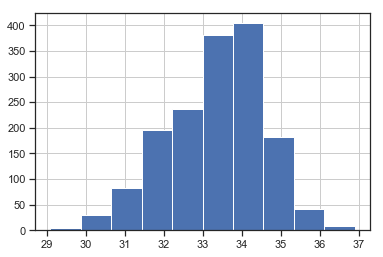

                 X axis= Spring (g)


In [27]:
# 先篩選數值型的欄位
print('----------------------------------------------------------------------------------------------------------------------------')
print('|| Histogram plot and range ||                                                                        || Total files:',len(data_list),'||')
print('''----------------------------------------------------------------------------------------------------------------------------


''')

dtype_select = [np.dtype('float64')]

df_final={}
out={}
noupper={}
nolower={}

print("Loading and Processing...")

for i in range(len(data_list)):
    df=data_list[i].iloc[4:,:]
    df2=df
    Range=range_list[i]
    numeric_columns = list(df.columns[list(df.dtypes.isin(dtype_select))])
    
    if len(data_list[i].columns)-1 == len(numeric_columns):
# 檢視這些欄位的數值範圍與直方圖
        output_data=[]
        output_range=[]
        outlier=[]
        for col in numeric_columns:
            #print('The range of',col,'in this file is between:',df[col].min(),"~",df[col].max())
            #print('The median of',col,'in this file is:',df[col].median())
            #df[col].hist()
            #plt.show()
            #print('''

            #''')
            # plot 2
            if col in Range:
                #upper=Range[col].max()
                upper=Range[col].iloc[0]
                #lower=Range[col].min()
                lower=Range[col].iloc[1]
                if Range[col].iloc[0] == 0:
                    noupper[i]=files[i]
                else:
                    if col == 'Max_sp':
                        if np.isnan(lower) == True :
                            nolower[i]=files[i]
                            lower=0
                            df=df.loc[(df[col] < upper) & (df[col]> lower)]
                            df=df.dropna(0)
                        elif np.isnan(upper) == True:
                            noupper[i]=files[i]
                        else:    
                            df=df.loc[(df[col] < upper) & (df[col]> lower)]
                            df=df.dropna(0)
                    #print('After cleaning those outliers above & below than 20%, the range of this file is between:',df2.min(),'~',df2.max())
                    #df2.hist(color='r')
                    #plt.show()
                    #print('''

                    #''')
                    #print('Removed:',len(out))
                    #print('''

                    #''')
                    elif  col == 'Resi':
                        df=df.loc[df[col] < upper]
                        df=df.dropna(0)
                        output_data.append(df)
                    else:
                        pass
            else:
                pass
        output_data=output_data[-1]
        output_data=pd.DataFrame(output_data)
        df_final[i]=output_data.dropna(0)
        outliers=[]
 # Note:從數值清單中拿出異常清單,把df_final裡符合異常清單的"值"計算zscore,再把異常清單的異常資料(已轉換為zscore)一筆一筆檢查是否大於3或小於-3,並確定這筆清單沒有重複出現在最終的outliers裡面
        for out_list in Range.columns:
            zscore=np.abs(stats.zscore(df_final[i][out_list]))
            for out_data in range(0,len(zscore)):
                if zscore[out_data] > 3 or zscore[out_data] < (-3):
                    if out_list not in outliers:
                        outliers.append(out_list)
        #print('''
        #''')
        #print('*****')
        #print('The number of columns that include ouliers:',len(outliers))
        #print('Potential outliers might exist in:',outliers)
        #print('''


#----------------------------------------------------------------------------------------------------------------------------''')    
    else:
        print('Some of columns might not be numeric data, please check the raw data again')

    percent= i/100
    goal=len(data_list)/100
    if i+1 == len(data_list):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()
        
print("[DONE]")
time.sleep(1)
print('''

File1:''',files[0],'''

Y axis= Frequency''')

df_final[0]['Max_sp'].hist()
plt.show()
print('                 X axis= Spring (g)')


#data_list[0].dropna(0)

In [28]:
# outliers
Diff_data={}
for i in range(len(files)):
    Diff_data[i]=pd.concat([df_final[i],data_list[i].iloc[4:,:]]).drop_duplicates(keep=False)
    Diff_data[i]['Specification']=Diff_data[i]['Specification'].str.split(pat = "-",n=1).str[0]

In [29]:
data_list2=data_list
for i in range(len(data_list2)):
    data_list2[i]['Specification']=data_list2[i]['Specification'].str.split(pat = "-",n=1).str[0]


In [30]:
# Clean data
clean_data={}
for i in range(len(files)):
    tmp=data_list2[i].iloc[4:,:]
    diff=Diff_data[i]['Specification'].tolist()
    tmp = tmp[~tmp['Specification'].isin(diff)]
    clean_data[i]=tmp

In [31]:
noupper

{}

In [32]:
nolower

{268: './2018\\de1-030dd63-02a0(1070425)#r201804032-p04-123pcs.xls.csv',
 269: './2018\\de1-030dd63-02a0(1070425)#r201804032-p04-回測-190pcs.xls.csv',
 270: './2018\\de1-030dd63-02a0(1070425)#r201804032-p05-01.xls.csv'}

In [33]:
df_final2={}
df_final2=df_final
for i in range(len(df_final2)):
    df_final2[i]['Specification']=df_final2[i]['Specification'].str.split(pat = "-",n=1).str[0]
    df_final[i] = df_final[i].loc[~df_final[i]['Specification'].index.duplicated(keep='first')]
    df_final2[i] = df_final2[i][~df_final2[i]['Specification'].duplicated(keep='first')]

In [34]:
data_list2=data_list
for i in range(len(data_list2)):
    data_list2[i]['Specification']=data_list2[i]['Specification'].str.split(pat = "-",n=1).str[0]
    data_list2[i]=data_list2[i][~data_list2[i]['Specification'].duplicated(keep='first')]
    data_list2[i]=data_list2[i].reset_index(drop=True)
    data_list2[i]=data_list2[i].iloc[3:,:]


In [35]:
Diff_data2=Diff_data
for i in range(len(Diff_data2)):
    Diff_data2[i]['Specification']=Diff_data2[i]['Specification'].str.split(pat = "-",n=1).str[0]
    Diff_data2[i] = Diff_data2[i][~Diff_data2[i]['Specification'].duplicated(keep='first')]

In [36]:
###　良率
accuracy=[]
for i in range(len(df_final2)):
    acc=((len(data_list2[i])-len(Diff_data2[i]))/len(data_list2[i]))*100
    #print("The accuracy of file:",files[i],"is:",acc)
    acclist=[files[i].replace('./'+year+'\\',''),acc]
    accuracy.append(acclist)

accuracy=pd.DataFrame(accuracy,columns=['ID','accuracy'])
f_acc=accuracy.sort_values(by=['accuracy'],ascending=False)
f_acc.mean()

accuracy    77.735334
dtype: float64

# 4. 合併所有files及顯示最大、最小值與眾數

In [38]:
print('This data list contain:',len(df_final),'files')
print('-------------------------------------------------------------------')

# check dataframe

frames=[]

print("Loading and Processing...")

for i in range(len(clean_data)):
    frames.append(clean_data[i])
    percent= i/100
    goal=len(clean_data)/100
    if i+1 == len(clean_data):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:    
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()
        time.sleep(0.0001)
print("[DONE]")   
    
df=pd.concat(frames,axis=0)
df=df[['Max_sp','reMax_sp','Resi','rResi']]

print('''

''')
print('Range of total',len(frames),'files are between:')
print('''
''')
print(df.min())
print('~')
print(df.max())
print('-------------------------------------------------------------------')
print('Mode:',df.mode())

This data list contain: 3240 files
-------------------------------------------------------------------
Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]



Range of total 3240 files are between:


Max_sp       4.5
reMax_sp     4.5
Resi       -27.6
rResi        0.0
dtype: float64
~
Max_sp       155.6
reMax_sp     152.5
Resi         599.8
rResi       9999.9
dtype: float64
-------------------------------------------------------------------
Mode:    Max_sp  reMax_sp  Resi  rResi
0    25.6      25.6  41.4   49.7


# 5. 合併後的整體資料大小( 列數,行數 )

In [39]:
df.shape

(3969426, 4)

# 6. 將所有的檔名合併回整體資料中

In [40]:
# bind with ID
filename = [f for f in glob.glob(path+"**/*.csv", recursive=True)]

file_list_id=[]
for f in filename:
    f=f.replace('./'+year+'\\','')
    file_list_id.append(f)

FINAL_ID={}

print("Loading and Processing...")

for i in range(len(clean_data)):
    clean_data[i]=clean_data[i].dropna(how='all', axis=0).reset_index(drop=True)
    #print(len(df_final[i]))
    ID=pd.DataFrame([file_list_id[i]]*len(clean_data[i]),columns=['ID'])
    FINAL_ID[i]=pd.concat([ID,clean_data[i]],axis=1)
    percent= i/100
    goal=len(clean_data)/100
    if i+1 == len(clean_data):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:    
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()

print("[DONE]")    
df2=pd.concat(FINAL_ID,axis=0)

Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]


# 7. 彈力最小值

In [41]:
sp_min=df2.loc[df2['Max_sp'] <= df2['Max_sp'].min()]
sp_min

ID Specification  \
269 215  de1-030dd63-02a0(1070425)#r201804032-p04-回測-19...            56   
    216  de1-030dd63-02a0(1070425)#r201804032-p04-回測-19...            56   
    217  de1-030dd63-02a0(1070425)#r201804032-p04-回測-19...            56   
    218  de1-030dd63-02a0(1070425)#r201804032-p04-回測-19...            56   
    219  de1-030dd63-02a0(1070425)#r201804032-p04-回測-19...            56   

         Max_sp  Max_sp_stroke  reMax_sp  reMax_sp_stroke   Resi  Resi_stroke  \
269 215     4.5          0.797       4.5            0.799  154.0          0.8   
    216     4.5          0.800       4.5            0.799  197.4          0.8   
    217     4.5          0.800       4.5            0.799  249.5          0.8   
    218     4.5          0.800       4.5            0.799  242.6          0.8   
    219     4.5          0.800       4.5            0.799  194.8          0.8   

          rResi  rResi_stroke  
269 215   368.2         0.721  
    216  1886.7         0.602  
    217  1302.1         0.604  
    218   374.6         0.655  
    219   378.0         0.754

# 8. 彈力最大值

In [42]:
sp_max=df2.loc[df2['Max_sp'] >= df2['Max_sp'].max()]
sp_max

,,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
687,85,de1-350ee13-03a0(1071030)#r201810051-p04-70pcs...,48,155.6,3.915,143.0,4.0,9.2,4.0,12.4,3.355


In [43]:
f_acc.loc[f_acc['ID']=='de5-075fg10-01a0(1080429)#r10804082-p03-1.xls.csv']

,ID,accuracy


# 9. 阻值最小值

In [44]:
resis_min=df2.loc[df2['Resi'] <= df2['Resi'].min()]
resis_min

,,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
2192,387,pe1-038ef28-01a0(1070905)#r10708120-p03-01.xls...,89,35.9,0.56,35.7,0.6,-27.6,0.6,6.3,0.4


# 10. 阻值最大值

In [45]:
resis_max=df2.loc[df2['Resi'] >= df2['Resi'].max()]
resis_max

,,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
2050,1228,pe1-010ef45-01f0(1030227)#r10701091-p04-1.xls.csv,300,7.8,0.389,7.7,0.4,599.8,0.4,656.3,0.301
2067,41,pe1-010ef45-01f0(1070911)#r10707071-p05-1.xls.csv,20,7.9,0.392,7.7,0.4,599.8,0.4,696.6,0.302


#### -----------------------------------------------------------------------------------------------------------------------------------------
## PART II：模組化彈力阻值與管長、管外徑
#### -----------------------------------------------------------------------------------------------------------------------------------------

# 料/鍍層

In [46]:
df3=df2

series=[]
for i in df3['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series.append(OTHERS)
   
Material=pd.DataFrame(series,columns=['ID','Materials'])
df3=df3.reset_index(drop=True)
df3_with_material = pd.concat([Material['Materials'],df3],axis=1)
df3_with_material['Materials'].value_counts()

DE        2370959
PE        1477700
CS          51750
OTHERS      42222
WE          26795
Name: Materials, dtype: int64

# 管外徑(Phi) (僅挑選 DE PE WE, 約占總資料筆數的97.66%)

In [47]:
# remove others
df3_without_others=df3_with_material.loc[df3_with_material['Materials']!='OTHERS']
df3_without_others=df3_without_others.loc[df3_without_others['Materials']!='CS']

series=[]
for i in df3_without_others['ID']:
    try:
        x=float(i[4:7])
        if x >0:
            x=x/100
            phi=[i,x]
            series.append(phi)
        else:
            NA=[i,'NA']
            series.append(NA)
    except ValueError:
        NA=[i,'NA']
        series.append(NA)
   
Phi=pd.DataFrame(series,columns=['ID','Phi'])
df3_without_others=df3_without_others.reset_index()
df3_with_Phi = pd.concat([Phi['Phi'],df3_without_others],axis=1)
df3_with_Phi['Phi'].value_counts()

0.56    646449
0.31    588069
0.29    438714
0.35    410665
0.52    407675
0.38    189630
0.26    129300
0.50    113060
0.55    110105
0.28     87495
0.59     79350
0.30     76585
0.40     62835
0.25     49500
0.58     48085
0.20     38840
0.83     38405
0.10     31907
0.51     31225
0.37     30550
1.00     28685
1.20     21760
2.50     20290
1.37     18190
0.66     17460
0.36     15860
0.42     15152
0.48     14415
0.27     13645
0.13     13290
0.22     11265
0.23      9005
0.46      8695
0.70      7535
0.61      7432
1.30      7145
0.24      6700
0.80      6645
0.45      5750
0.78      4650
0.18      3735
3.50      2786
0.34      1875
1.63      1845
0.15      1655
0.21      1545
Name: Phi, dtype: int64

In [48]:
columnsTitles=['ID','Materials','Phi','Specification', 'Max_sp', 'Max_sp_stroke',
       'reMax_sp', 'reMax_sp_stroke', 'Resi', 'Resi_stroke', 'rResi',
       'rResi_stroke']
Final_dataframe=df3_with_Phi.reindex(columns=columnsTitles)

# 兩端頭型

In [49]:

series=[]
for i in Final_dataframe['ID']:
    if i.isdigit():
        NA=[i,'NA']
        series.append(NA)
    else:
        i=i.replace(" ", "")
        types=[i,i[7:9]]
        series.append(types)
   
TYPES=pd.DataFrame(series,columns=['ID','Types'])
Final_dataframe=Final_dataframe.reset_index(drop=True)
Final_with_TYPES = pd.concat([TYPES['Types'],Final_dataframe],axis=1)
Final_with_TYPES['Types'].value_counts()

ef    1414897
df    1147838
bt     236920
ff     196219
dl     133175
bb     129660
bd     110140
dd      73192
bf      71525
be      68005
ee      62406
el      56930
de      40085
ad      26750
dt      18190
eh      12305
fg      12075
tt      12027
bl      11060
ep      10590
fs      10290
bp       6225
fh       4650
ds       3370
bg       3005
eg       1655
gm       1650
dh        620
Name: Types, dtype: int64

In [50]:
columnsTitles=['ID','Materials','Phi','Types','Specification', 'Max_sp', 'Max_sp_stroke',
       'reMax_sp', 'reMax_sp_stroke', 'Resi', 'Resi_stroke', 'rResi',
       'rResi_stroke']
Final_dataframe=Final_with_TYPES.reindex(columns=columnsTitles)

# 管長

In [51]:
series=[]
for i in Final_dataframe['ID']:
    i=i.replace(" ","")
    try:
        x=float(i[9:11])
        if x >0:
            x=x/10
            phi=[i,x]
            series.append(phi)
        else:
            NA=[i,'NA']
            series.append(NA)
    except ValueError:
        NA=[i,'NA']
        series.append(NA)
   
Length=pd.DataFrame(series,columns=['ID','Length'])
Final_dataframe=Final_dataframe.reset_index(drop=True)
Length=Length.reset_index(drop=True)
Final_with_length = pd.concat([Length['Length'],Final_dataframe],axis=1)

In [53]:
columnsTitles=['ID','Materials','Phi','Types','Length','Specification', 'Max_sp', 'Max_sp_stroke',
       'reMax_sp', 'reMax_sp_stroke', 'Resi', 'Resi_stroke', 'rResi',
       'rResi_stroke']
Final_dataframe=Final_with_length.reindex(columns=columnsTitles)
Final_dataframe.head(10)

,ID,Materials,Phi,Types,Length,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
0,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,1,9.7,0.600,9.7,0.600,177.5,0.6,224.1,0.403
1,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,1,9.8,0.598,9.8,0.600,227.0,0.6,283.9,0.430
2,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,1,9.8,0.597,9.8,0.599,214.0,0.6,266.7,0.413
3,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,1,9.9,0.600,9.9,0.600,206.4,0.6,261.9,0.443
4,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,1,9.8,0.600,9.8,0.600,212.5,0.6,250.4,0.442
5,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,4,10.6,0.600,10.6,0.600,320.4,0.6,382.0,0.435
6,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,4,10.6,0.600,10.6,0.600,194.8,0.6,312.1,0.458
7,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,4,10.6,0.596,10.6,0.600,192.3,0.6,319.2,0.411
8,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,4,10.6,0.600,10.6,0.600,188.2,0.6,285.6,0.488
9,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,DE,0.2,de,4.0,4,10.6,0.600,10.6,0.600,215.9,0.6,311.3,0.504


# 11. The Correlation of Spring and Resistance

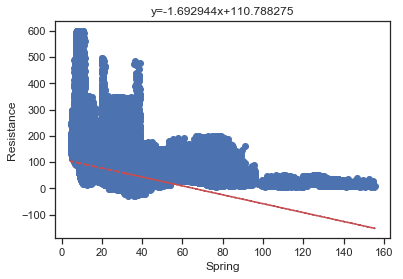

In [54]:
cor_df=df2[['Max_sp','Resi']]
#cor_df
x=df2[['Max_sp']].values
y=df2[['Resi']].values
plt.scatter(x, y)

plt.xlabel('Spring')
plt.ylabel('Resistance')

z = np.polyfit(x.flatten(), y.flatten(), 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("y=%.6fx+%.6f"%(z[0],z[1]))

plt.show()

In [55]:
stats.pearsonr(x, y)

(array([-0.36488839]), array([0.]))

# 12. Clustering by Spring, Resistance, Phi and Length

In [56]:
Final_WE=Final_dataframe.loc[Final_dataframe['Materials']=='WE']

In [57]:
# dara
cor_data=stats.zscore(Final_WE[['Max_sp','Resi','Phi','Length']])
#cor_data=Final_dataframe[['Max_sp','Resi','Phi','Length']].values
cluster_list=[]
for data in cor_data:
    cluster_list.append(data)
cluster_list=np.array(cluster_list)
cluster_list

array([[-0.97156544,  0.47624542, -1.00567318,  0.71922183],
       [-0.85309856,  0.42084421, -1.00567318,  0.71922183],
       [-0.87284304,  0.39168569, -1.00567318,  0.71922183],
       ...,
       [-1.6823667 , -1.1303894 ,  1.59104824, -1.30040302],
       [-1.72185565, -1.06040894,  1.59104824, -1.30040302],
       [-1.80083357, -0.99626018,  1.59104824, -1.30040302]])

In [18]:
from sklearn import cluster, metrics

# # loop
# silhouette_avgs = []
# silhouette_list=[]
# ks = range(2, 11)
# for k in ks:
#     kmeans_fit = cluster.KMeans(n_clusters = k).fit(cluster_list)
#     print('Processing km')
#     cluster_labels = kmeans_fit.labels_
#     print('Processing label')
#     silhouette_avg = metrics.silhouette_score(cluster_list, cluster_labels,metric='euclidean')
#     print('Processing score')
#     silhouette_avgs.append(silhouette_avg)
#     combo=[k,silhouette_avg]
#     silhouette_list.append(combo)
#     percent= k/100
#     goal=len(df_final)/10
#     if k+1 == 9:
#         sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
#         sys.stdout.flush()
#     else:    
#         sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
#         sys.stdout.flush()
    
# plt.bar(ks, silhouette_avgs)
# plt.show()

# silhouette_list=pd.DataFrame(silhouette_list,columns=['ks','silhouette_avgs'])
# num_cluster=silhouette_list.loc[silhouette_list['silhouette_avgs']==silhouette_list['silhouette_avgs'].max(),['ks']]
# num_cluster['ks'].values[0]

# 13. 決定分群數量 (此時最好要有分散式運算來增加效率)

In [59]:
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# plt.plot()
# plt.xlabel('Spring')
# plt.ylabel('Resistance')
# plt.title('Dataset')
# plt.scatter(x, y)
# plt.show()

# # create new plot and data
# plt.plot()
# X = np.array(list(zip(x, y))).reshape(len(x), 2)
# colors = ['b', 'g', 'r']
# markers = ['o', 'v', 's']



Now processing: 1
Now processing: 2
Now processing: 3
Now processing: 4
Now processing: 5
Now processing: 6
Now processing: 7
Now processing: 8
Now processing: 9


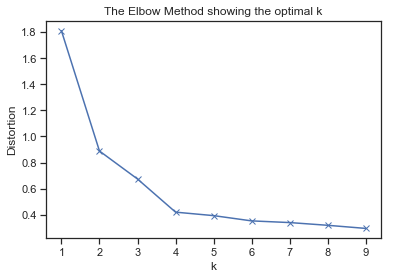

In [60]:
# k means determine k
distortions = []



K = range(1,10)
for k in K:
    print("Now processing:",k)
    kmeanModel = KMeans(n_clusters=k).fit(cluster_list)
    kmeanModel.fit(cluster_list)
    distortions.append(sum(np.min(cdist(cluster_list, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster_list.shape[0])
    

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [61]:
from sklearn import cluster, metrics
#kmeans_fit = cluster.KMeans(n_clusters = num_cluster['ks'].values[0]).fit(cluster_list)
kmeans_fit = cluster.KMeans(n_clusters = 4).fit(cluster_list)
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

分群結果：
[2 2 2 ... 1 1 1]
---


In [62]:
cluster_labels_df=pd.DataFrame(cluster_labels,columns=['cluster_labels'])
Final_WE=Final_WE.reset_index(drop=True)
cluster_result=pd.concat([Final_WE,cluster_labels_df],axis=1)
cluster_result[['Max_sp','Resi','Phi','Length','cluster_labels']].sort_values(by=['cluster_labels'],ascending=False)

,Max_sp,Resi,Phi,Length,cluster_labels
19172,37.6,155.2,0.34,1.5,3
18875,38.3,119.2,0.34,1.5,3
18887,38.1,241.1,0.34,1.5,3
18886,38.3,162.3,0.34,1.5,3
18885,38.8,128.8,0.34,1.5,3
18884,38.5,134.3,0.34,1.5,3
18883,38.1,130.2,0.34,1.5,3
18882,38.0,151.6,0.34,1.5,3
18881,38.0,136.1,0.34,1.5,3
18880,37.9,162.8,0.34,1.5,3


In [63]:
cluster1=cluster_result.loc[cluster_result['cluster_labels']==0]
cluster1[['ID','Max_sp','Resi','Phi','Length']].describe()

,Max_sp,Resi,Phi,Length
count,13208.000000,13208.000000,13208.000000,13208.0
mean,33.367777,61.718882,0.336354,4.0
std,0.925252,13.949041,0.018965,0.0
min,30.200000,35.500000,0.310000,4.0
25%,32.700000,52.500000,0.310000,4.0
50%,33.200000,59.300000,0.350000,4.0
75%,34.000000,67.600000,0.350000,4.0
max,35.900000,148.300000,0.350000,4.0


In [64]:
cluster1.head()

,ID,Materials,Phi,Types,Length,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
4345,we1-031ef40-01f0(1070205)#r10701061-p03-1.xls.csv,WE,0.31,ef,4.0,1,33.5,0.65,33.5,0.65,50.2,0.65,69.0,0.48,0
4346,we1-031ef40-01f0(1070205)#r10701061-p03-1.xls.csv,WE,0.31,ef,4.0,1,33.3,0.65,33.1,0.65,53.3,0.65,67.2,0.45,0
4347,we1-031ef40-01f0(1070205)#r10701061-p03-1.xls.csv,WE,0.31,ef,4.0,1,33.0,0.65,33.0,0.65,50.0,0.65,64.1,0.45,0
4348,we1-031ef40-01f0(1070205)#r10701061-p03-1.xls.csv,WE,0.31,ef,4.0,1,33.2,0.65,33.2,0.65,54.2,0.65,63.6,0.45,0
4349,we1-031ef40-01f0(1070205)#r10701061-p03-1.xls.csv,WE,0.31,ef,4.0,1,32.8,0.65,32.8,0.65,52.8,0.65,62.1,0.45,0


In [65]:
cluster2=cluster_result.loc[cluster_result['cluster_labels']==1]
cluster2[['ID','Max_sp','Resi','Phi','Length']].describe()

,Max_sp,Resi,Phi,Length
count,7310.000000,7310.000000,7.310000e+03,7.310000e+03
mean,23.475663,32.684350,5.600000e-01,1.900000e+00
std,1.673509,9.164713,4.752080e-14,2.376040e-13
min,20.100000,18.500000,5.600000e-01,1.900000e+00
25%,22.300000,27.400000,5.600000e-01,1.900000e+00
50%,23.200000,31.100000,5.600000e-01,1.900000e+00
75%,24.400000,35.100000,5.600000e-01,1.900000e+00
max,29.900000,99.200000,5.600000e-01,1.900000e+00


In [66]:
cluster3=cluster_result.loc[cluster_result['cluster_labels']==2]
cluster3[['ID','Max_sp','Resi','Phi','Length']].describe()

,Max_sp,Resi,Phi,Length
count,4366.000000,4366.000000,4366.000000,4366.0
mean,25.697435,78.159986,0.280153,4.0
std,0.959788,8.576159,0.002285,0.0
min,20.100000,51.800000,0.280000,4.0
25%,25.200000,72.500000,0.280000,4.0
50%,25.800000,77.600000,0.280000,4.0
75%,26.300000,82.900000,0.280000,4.0
max,32.800000,155.800000,0.350000,4.0


In [67]:
cluster4=cluster_result.loc[cluster_result['cluster_labels']==3]
cluster4[['ID','Max_sp','Resi','Phi','Length']].describe()

,Max_sp,Resi,Phi,Length
count,1911.000000,1911.000000,1911.000000,1911.000000
mean,37.594087,149.916484,0.339581,1.547096
std,0.920535,55.258854,0.003722,0.339973
min,31.900000,73.300000,0.310000,1.500000
25%,37.200000,116.200000,0.340000,1.500000
50%,37.700000,135.600000,0.340000,1.500000
75%,38.200000,163.000000,0.340000,1.500000
max,38.900000,485.200000,0.350000,4.000000


In [68]:
cluster5=cluster_result.loc[cluster_result['cluster_labels']==4]
cluster5[['ID','Max_sp','Resi','Phi','Length']].describe()

,Max_sp,Resi,Phi,Length
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


# 14. 疊圖

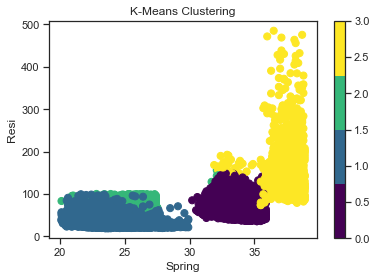

In [69]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cluster_result['Max_sp'],cluster_result['Resi'],
                     c=cluster_result['cluster_labels'],cmap=plt.cm.get_cmap('viridis', 4),s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Spring')
ax.set_ylabel('Resi')
plt.colorbar(scatter)
plt.show()

In [27]:
cluster1['ID'].value_counts()

de4-050be49-01a3(1071005)#r10709071-p09-1.xls.csv            1698
de4-052ef23-04f0(1080227)#r10712081-p05-1.xls.csv            1694
de4-035df24-03f0(1070205)#r10701056-p03-1.xls.csv            1694
de4-035df24-03f0(1070221)#r10701056-p03-1.xls.csv            1693
de3-055ff37-01a0(1070627)#r10706046-p03-1.xls.csv            1692
de1-038df40-03f0(1070413)#r10704005-p05-1.xls.csv            1692
de4-035df24-03f0(1070201)#r10701056-p03-1.xls.csv            1691
pe4-035bt24-01a0(1070925)#r10708131-p07-2.xls.csv            1691
de4-035df24-03f0(1070205)#r10701056-p03-01.xls.csv           1690
de4-035df24-03f0(1070214)#r10701056-p05-01.xls.csv           1690
pe1-036bd35-01a0(1071030)#r10710045-p05-01.xls.csv           1689
de4-035df24-03f0(1070201)#r10701056-p03-2.xls.csv            1689
de3-055ff37-01a0(1070627)#r10706046-p04-1.xls.csv            1689
de4-035df24-03f0(1070213)#r10701056-p09-02.xls.csv           1688
de4-035df24-03f0(1070202)#r10701056-p03-1.xls.csv            1687
de3-031dl1

In [28]:
# Merge
series=[]

for i in cluster1['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series.append(OTHERS)
   
Newcluster1=pd.DataFrame(series,columns=['ID','Materials'])
cluster1=cluster1.reset_index(drop=True)
res = pd.concat([Newcluster1['Materials'],cluster1],axis=1)
res.head()

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
0,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-1,31.7,0.497,31.5,0.5,71.9,0.5,94.0,0.485,0
1,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-2,32.2,0.494,32.1,0.5,69.2,0.5,89.8,0.445,0
2,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-3,31.9,0.499,31.7,0.5,71.0,0.5,84.2,0.385,0
3,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-4,32.0,0.499,31.7,0.5,67.6,0.5,79.8,0.381,0
4,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-5,32.1,0.497,32.0,0.5,59.8,0.5,77.8,0.381,0


In [29]:
cluster2['ID'].value_counts()

pe1-010ef45-01f0(1070511)#r201804015-p04-1.xls.csv         1680
pe1-010ef45-01f0(1070511)#r201804015-p03-2.xls.csv         1676
pe1-010ef45-01f0(1070511)#r201804015-p03-1.xls.csv         1668
pe1-010ef45-01f0(1070227)#r10701091-p03-01.xls.csv         1630
pe1-010ef45-01f0(1070227)#r10701091-p03-1.xls.csv          1602
pe1-010ef45-01f0(1070913)#r10707071-p03-1.xls.csv          1545
pe1-010ef45-01f0(1070913)#r10707071-p06-1.xls.csv          1529
pe1-010ef45-01f0(1070914)#r10707071-p06-294pcs.xls.csv     1405
pe1-010ef45-01f0(1070208)#r10701091-p03-01.xls.csv         1368
pe1-010ef45-01f0(1030226)#r10701091-p04-01.xls.csv         1336
pe1-010ef45-01f0(1070917)#r10707071-p03-1.xls.csv          1231
pe1-010ef45-01f0(1030227)#r10701091-p04-1.xls.csv          1195
pe1-010ef45-01f0(1070906)#r10707071-p03-1.xls.csv          1187
pe1-010ef45-01f0(1071017)#r10707071-p03-2.xls.csv          1176
pe1-010ef45-01f0(1070918)#r10707071-p06-1.xls.csv          1168
pe1-010ef45-01f0(1070522)#r201804015-p03

In [30]:
# Merge
series=[]

for i in cluster2['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series.append(OTHERS)
   
Newcluster2=pd.DataFrame(series,columns=['ID','Materials'])
cluster2=cluster2.reset_index(drop=True)
res2 = pd.concat([Newcluster2['Materials'],cluster2],axis=1)
res2.head()

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
0,DE,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,38-3,10.0,0.596,10.0,0.598,234.7,0.6,277.7,0.412,1
1,DE,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,45-3,10.0,0.594,10.0,0.600,260.7,0.6,246.7,0.426,1
2,DE,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,45-5,10.0,0.595,10.0,0.600,252.4,0.6,279.3,0.488,1
3,DE,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,68-2,10.1,0.596,10.1,0.600,313.6,0.6,331.2,0.458,1
4,DE,de1-020de40-02a0(1070430)#r10704065-p04-01.xls...,106-1,10.5,0.600,10.5,0.600,247.1,0.6,226.2,0.600,1


In [31]:
cluster3['ID'].value_counts()

pe3-018dl45-01a0(1071207)#r10711010-p03-1.xls.csv               1700
pe3-018df45-01f0(1071206)#r10711005-p03-1.xls.csv               1699
pe3-020el31-04a0(1071112)#r10710015-p04-01.xls.csv              1693
pe3-020el31-04a0(1071113)#r10710015-p04-2.xls.csv               1682
de3-020el31-02a0(1071109)#r10710010-p08-1.xls.csv               1680
pe3-020el31-04a0(1071113)#r10710015-p04-1.xls.csv               1678
pe3-020el31-04a0(1071112)#r10710015-p04-02.xls.csv              1674
de3-020el31-02a0(1071112)#r10710010-p04-3.xls.csv               1672
de3-020el31-02a0(1071109)#r10710010-p04-1.xls.csv               1664
pe1-020ef40-01a0(1071102)#r10710064-p03-01.xls.csv              1651
de1-026bf40-03f0(1070616)#r10705089-p04-1.xls.csv               1631
de1-028df54-01f0(1071107)#r10710069-p08-1.xls.csv               1631
de1-026bf40-03f0(1070615)#r10705089-p04-2-1.xls.csv             1612
pe3-013ds33-01f0(1071205)#r10710093-p03-2.xls.csv               1592
pe3-013ds33-01f0(1071205)#r1071009

In [32]:
series=[]

for i in cluster3['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series.append(OTHERS)
   
Newcluster3=pd.DataFrame(series,columns=['ID','Materials'])
cluster3=cluster3.reset_index(drop=True)
res3 = pd.concat([Newcluster3['Materials'],cluster3],axis=1)
res3.head()

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
0,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,8-3,31.9,0.500,30.3,0.5,95.9,0.5,144.1,0.352,2
1,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,8-4,32.2,0.498,31.6,0.5,86.1,0.5,128.0,0.366,2
2,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,10-4,31.3,0.499,31.3,0.5,82.4,0.5,116.1,0.366,2
3,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,10-5,31.2,0.500,30.9,0.5,89.7,0.5,173.4,0.412,2
4,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,15-3,30.9,0.500,30.7,0.5,79.4,0.5,92.6,0.359,2


In [33]:
res['Materials'].value_counts()

DE        1735431
PE        1218912
CS          37711
OTHERS      29710
WE          21684
Name: Materials, dtype: int64

In [34]:
res2['Materials'].value_counts()

PE        36353
DE         2497
OTHERS     1140
WE           70
Name: Materials, dtype: int64

In [35]:
res3['Materials'].value_counts()

DE        366822
PE        126281
OTHERS     10421
CS          5220
WE          4470
Name: Materials, dtype: int64

# 15. 從料號著手檢視彈力阻值

In [36]:
series2=[]

for i in df2['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series2.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series2.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series2.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series2.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series2.append(OTHERS)
        
check_materials=pd.DataFrame(series2,columns=['ID','Materials'])
dff=df2.reset_index(drop=True)
check_materials_data = pd.concat([check_materials['Materials'],dff],axis=1)
check_materials_data

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
0,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-1,31.7,0.497,31.5,0.5,71.9,0.5,94.0,0.485
1,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-2,32.2,0.494,32.1,0.5,69.2,0.5,89.8,0.445
2,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-3,31.9,0.499,31.7,0.5,71.0,0.5,84.2,0.385
3,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-4,32.0,0.499,31.7,0.5,67.6,0.5,79.8,0.381
4,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,2-5,32.1,0.497,32.0,0.5,59.8,0.5,77.8,0.381
5,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,3-1,32.2,0.493,31.9,0.5,55.8,0.5,77.5,0.351
6,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,3-2,32.1,0.494,32.1,0.5,60.5,0.5,79.8,0.405
7,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,3-3,32.4,0.493,32.2,0.5,67.2,0.5,90.1,0.350
8,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,3-4,32.1,0.494,32.1,0.5,65.4,0.5,85.7,0.353
9,OTHERS,1-05840-030(1070126)#10701020-05-1.xls.csv,3-5,32.7,0.497,32.4,0.5,73.6,0.5,109.6,0.351


In [37]:
CS=check_materials_data.loc[check_materials_data['Materials']=='CS',['Max_sp','Resi']]
WE=check_materials_data.loc[check_materials_data['Materials']=='WE',['Max_sp','Resi']]
PE=check_materials_data.loc[check_materials_data['Materials']=='PE',['Max_sp','Resi']]
DE=check_materials_data.loc[check_materials_data['Materials']=='DE',['Max_sp','Resi']]
OTHERS=check_materials_data.loc[check_materials_data['Materials']=='OTHERS',['Max_sp','Resi']]

In [38]:
CS.describe()

,Max_sp,Resi
count,42931.000000,42931.000000
mean,36.699094,55.309627
std,25.139450,18.166782
min,8.600000,12.700000
25%,26.400000,42.100000
50%,29.300000,53.300000
75%,34.000000,66.800000
max,140.700000,143.200000


In [39]:
WE.describe()

,Max_sp,Resi
count,26224.000000,26224.000000
mean,29.999802,61.172518
std,5.104273,31.494362
min,20.100000,18.500000
25%,25.000000,40.000000
50%,32.500000,57.400000
75%,33.700000,72.100000
max,38.900000,471.800000


In [40]:
PE.describe()

,Max_sp,Resi
count,1.381546e+06,1.381546e+06
mean,2.878783e+01,6.227115e+01
std,7.458379e+00,5.525480e+01
min,6.100000e+00,1.000000e-01
25%,2.430000e+01,4.150000e+01
50%,2.790000e+01,5.110000e+01
75%,3.490000e+01,6.380000e+01
max,5.960000e+01,5.837000e+02


In [41]:
DE.describe()

,Max_sp,Resi
count,2.104750e+06,2.104750e+06
mean,3.030946e+01,5.522296e+01
std,1.023686e+01,3.278151e+01
min,4.800000e+00,1.000000e-01
25%,2.590000e+01,3.440000e+01
50%,2.900000e+01,4.490000e+01
75%,3.300000e+01,6.390000e+01
max,1.556000e+02,3.485000e+02


In [42]:
OTHERS.describe()

,Max_sp,Resi
count,41271.000000,41271.000000
mean,26.209978,75.910135
std,10.294471,53.308273
min,6.200000,16.000000
25%,23.400000,43.800000
50%,26.400000,58.100000
75%,30.400000,82.600000
max,143.800000,483.100000
